In [525]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


### Generate random linearly seperable data:
Using `make_blobs` I generated a two-cluster linearly seperated dataset to on which to train my classifier on. Later I will plot the decision boundary to using `plot_decision_boundary`.

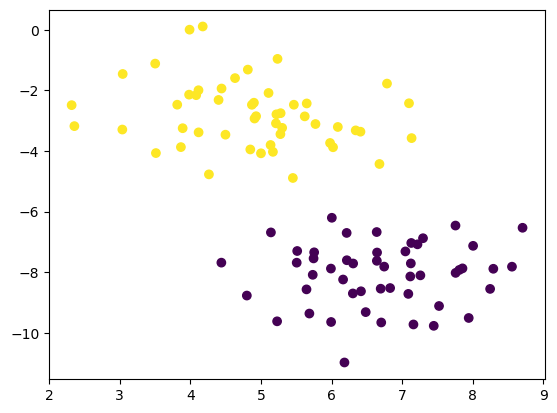

In [527]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1.0, random_state=44)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

### Functions to implement:
- `threshold_function` (heaviside function)
- `predict` (returns predicted classes based on the product of input and learned weights
- `train` (executes the training loop displaying current accuracy and number of epochs trained)
- `plot_decision_boundary` (plots the learned decision boundary and the original data)


In [529]:
def threshold_function(z):
    return 1 if z >= 0 else 0

In [530]:
def predict(X, W):
    z = np.dot(X, W)
    return np.vectorize(threshold_function)(z)

X_bias_added = np.hstack((np.ones((100, 1)), X))
print(X_bias_added[0].reshape(1, -1))

[[1.         3.98890942 0.00548452]]


In [531]:
def train(X, y, epochs=100, lr=0.1):
    # initialize bias and weights to small values
    W = np.random.uniform(-0.01, 0.01, size=(3, 1))
    # add column-wise the ones to the original input to account for bias
    X_bias_added = np.hstack((np.ones((X.shape[0], 1)), X))

    for epoch in range(epochs):
        for i in range(X_bias_added.shape[0]):
            xi = X_bias_added[i].reshape(1, -1) # (3, 1) -> (1, 3)
            yi = y[i]

            y_hat = threshold_function(np.dot(xi, W)[0][0])
            
            W = W + lr * (yi - y_hat) * xi.T # learning rule
            predictions = predict(X_bias_added, W)
            acc = np.mean(predictions.flatten() == y)
        print(f"Epoch {epoch+1}/{epochs}, Accuracy: {acc:.2f}")

    return W

In [532]:
W_trained = train(X, y, epochs=100, lr=0.1)

Epoch 1/100, Accuracy: 0.92
Epoch 2/100, Accuracy: 0.92
Epoch 3/100, Accuracy: 0.83
Epoch 4/100, Accuracy: 0.91
Epoch 5/100, Accuracy: 0.88
Epoch 6/100, Accuracy: 0.88
Epoch 7/100, Accuracy: 0.93
Epoch 8/100, Accuracy: 0.93
Epoch 9/100, Accuracy: 0.91
Epoch 10/100, Accuracy: 0.94
Epoch 11/100, Accuracy: 0.92
Epoch 12/100, Accuracy: 0.93
Epoch 13/100, Accuracy: 0.93
Epoch 14/100, Accuracy: 0.96
Epoch 15/100, Accuracy: 0.91
Epoch 16/100, Accuracy: 0.94
Epoch 17/100, Accuracy: 0.91
Epoch 18/100, Accuracy: 0.95
Epoch 19/100, Accuracy: 0.96
Epoch 20/100, Accuracy: 0.91
Epoch 21/100, Accuracy: 0.91
Epoch 22/100, Accuracy: 0.91
Epoch 23/100, Accuracy: 0.91
Epoch 24/100, Accuracy: 0.91
Epoch 25/100, Accuracy: 0.91
Epoch 26/100, Accuracy: 0.91
Epoch 27/100, Accuracy: 0.97
Epoch 28/100, Accuracy: 0.92
Epoch 29/100, Accuracy: 0.97
Epoch 30/100, Accuracy: 0.92
Epoch 31/100, Accuracy: 0.91
Epoch 32/100, Accuracy: 0.91
Epoch 33/100, Accuracy: 0.91
Epoch 34/100, Accuracy: 0.91
Epoch 35/100, Accuracy:

In [533]:
def plot_decision_boundary(W, X, y):  
    feat1_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
    
    plt.scatter(X[:, 0], X[:, 1], c=y)

    if W_trained[2] != 0:
        feat2_vals = -(W[0] + W[1] * feat1_vals) / W[2]
        plt.plot(feat1_vals, feat2_vals, color='red', label='Decision Boundary')
    
    else:
        vertical_line = -W[0] / W[1]
        plt.axvline(x=vertical_line, color='red', label='Decision Boundary')

    plt.legend()
    plt.show()
    

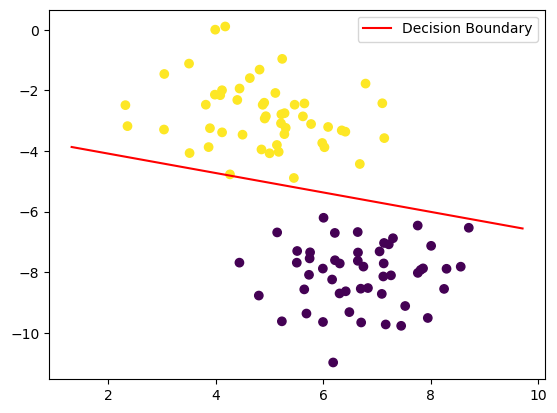

In [534]:
plot_decision_boundary(W_trained, X, y)

### Future additions:
- Early stopping after no improvement in trianing (use some max number of epochs with no improvement)
- Multiclass implementation using one vs. rest for multi multi-cluster data